#### KALMAN FILTER UPDATE

#### Measuring multiple floors

P_k is [[0.0034 0.0026 0.0036]
 [0.0026 0.002  0.0028]
 [0.0036 0.0028 0.004 ]]
H_k is [[1. 0. 0.]
 [0. 1. 0.]]
noise strength is [[0.005 0.   ]
 [0.    0.005]]
epsilon is [[ 2.16493494]
 [-0.99065175]]
iteration step
 0
data is 
 [0.35308402 0.22995034]
Kalman gain is 
 [[0.32744043 0.24980784]
 [0.24980784 0.19292852]
 [0.3443505  0.27209839]]
x_k is 
 0 [0.2 0.3 0.4]
x_a is 
 [0.23262694 0.32472701 0.43365416]
forecast variance is 
 0 [[0.0034 0.0026 0.0036]
 [0.0026 0.002  0.0028]
 [0.0036 0.0028 0.004 ]]
updated variance is 
 [[0.0016372  0.00124904 0.00172175]
 [0.00124904 0.00096464 0.00136049]
 [0.00172175 0.00136049 0.00199846]]


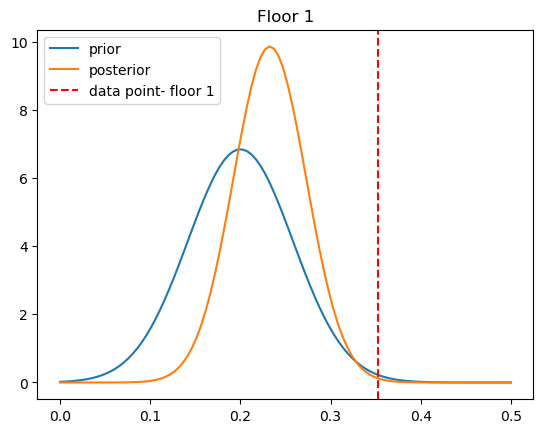

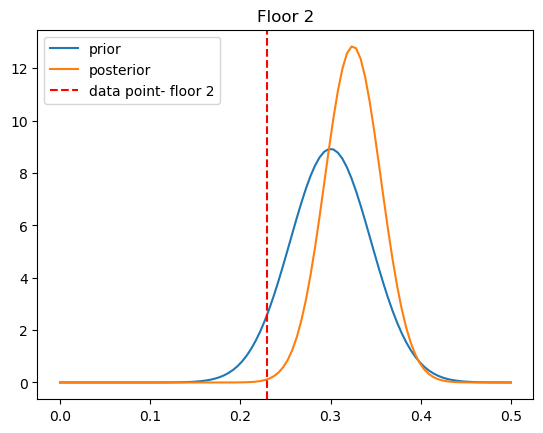

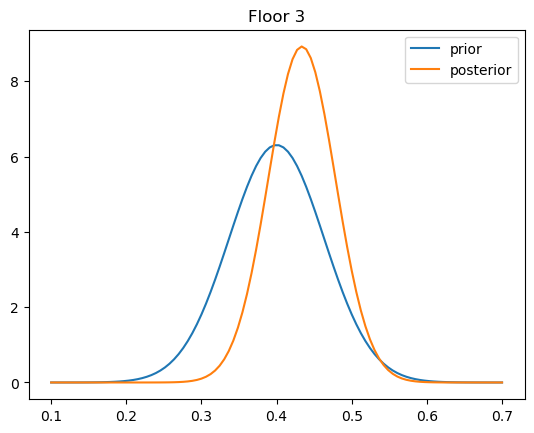

In [1]:

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

import sys

### Index 1 represents floor number and second represents PC coefficients

# First floor
u10 = 0.2
u11 = 0.05
u12 = 0.03


# Second floor
u20 = 0.3
u21 = 0.04
u22 = 0.02


# Third floor
u30 = 0.4
u31 = 0.06
u32 = 0.02



# Covraince Matrix - Analytical

C = np.zeros((3,3))

C[0,0] = u11**2 + u12**2
C[1,1] = u21**2 + u22**2
C[2,2] = u31**2 + u32**2

C[0,1] = u11*u21 + u12*u22
C[0,2] = u11*u31 + u12*u32
C[1,2] = u21*u31 + u22*u32

C[1,0] = C[0,1]
C[2,0] = C[0,2]
C[2,1] = C[1,2]

# print(C)


# Mean value of the PC coefficents
x_k = np.array([u10,u20,u30])


statesize = 3
observed = 2

## Covariance of the state
P_k = np.zeros((statesize,statesize))
P_k = C
print("P_k is", P_k)


x1 =  np.linspace(0.0,0.5, 100)

x2 =  np.linspace(0.0,0.5, 100)

x3 =  np.linspace(0.1,0.7, 100)



H_k = np.zeros((observed,statesize))

if(observed == 1): 
    H_k[0,0] = 1
elif (observed == 2):
    H_k[0,0] = 1
    H_k[1,1] = 1
else:
    H_k[0,0] = 1
    H_k[1,1] = 1
    H_k[2,2] = 1


print("H_k is",H_k)
# np.array([[1, 0, 0], [0,0,0], [0,0,0]])

np.random.seed(106)
# Noise strength
noisescal = 0.005
mu_epsilon = np.zeros(observed)
Gamma = np.eye(observed)
Gamma = Gamma * noisescal


print("noise strength is",Gamma)
# epsilon = np.random.normal(0,np.sqrt(Gamma),1)

# print(epsilon)

p1 = norm.pdf(x1, loc= x_k[0], scale = np.sqrt(P_k[0,0]))
p2 = norm.pdf(x2, loc= x_k[1], scale = np.sqrt(P_k[1,1]))
p3 = norm.pdf(x3, loc= x_k[2], scale = np.sqrt(P_k[2,2]))

nsteps = 1

# epsilon = np.random.multivariate_normal(mu_epsilon,np.sqrt(Gamma),nsteps)

# epsilon = np.random.normal(0,np.sqrt(noisescal),size=(observed,nsteps))

epsilon = np.random.normal(0,1,size=(observed,nsteps))


print("epsilon is", epsilon)

# sys.exit()

for i in range(0,nsteps):


    print("iteration step\n",i)


    d_k = H_k @ x_k + np.sqrt(noisescal) * epsilon[:,i]

    print("data is \n" ,d_k)

    K_g = P_k @ H_k.T @ np.linalg.inv(H_k @ P_k @ H_k.T + Gamma)

    print("Kalman gain is \n", K_g)

    ### Update state

    x_a = x_k + K_g @ (d_k - H_k @ x_k)

    print("x_k is \n", i, x_k)
    print("x_a is \n", x_a)

    P_a = (np.identity(statesize) - K_g @ H_k) @ P_k

    print("forecast variance is \n",i, P_k)
    print("updated variance is \n", P_a)


    # p1 = norm.pdf(x1, loc= x_k[0], scale = np.sqrt(P_k[0,0]))
    # p2 = norm.pdf(x2, loc= x_k[1], scale = np.sqrt(P_k[1,1]))
    # p3 = norm.pdf(x3, loc= x_k[2], scale = np.sqrt(P_k[2,2]))

    p11 = norm.pdf(x1, loc= x_a[0], scale = np.sqrt(P_a[0,0]))
    p22 = norm.pdf(x2, loc= x_a[1], scale = np.sqrt(P_a[1,1]))
    p33 = norm.pdf(x3, loc= x_a[2], scale = np.sqrt(P_a[2,2]))

    plt.figure(i)
    plt.title("Floor 1")
    plt.plot(x1,p1,label = 'prior')
    plt.plot(x1,p11,label = 'posterior')
    plt.axvline(d_k[0], color='red', linestyle='--', label='data point- floor 1')
    plt.legend()
    plt.savefig('KF_floor3_1observed.pdf')
    plt.show()

    plt.figure(i+1)
    plt.title("Floor 2")
    plt.plot(x2,p2,label = 'prior')
    plt.plot(x2,p22,label = 'posterior')
    plt.axvline(d_k[1], color='red', linestyle='--', label='data point- floor 2')
    plt.legend()
    plt.savefig('KF_floor3_1observed.pdf')
    plt.show()

    plt.figure(i+2)
    plt.title("Floor 3")
    plt.plot(x3,p3,label = 'prior')
    plt.plot(x3,p33,label = 'posterior')
    # plt.axvline(d_k[2], color='red', linestyle='--', label='x = 5')
    plt.legend()
    plt.savefig('KF_floor3_1observed.pdf')
    plt.show()

    # x_k = x_a
    # P_k = P_a



In [2]:


p11 = norm.pdf(x1, loc= x_a[0], scale = np.sqrt(P_a[0,0]))
p22 = norm.pdf(x2, loc= x_a[1], scale = np.sqrt(P_a[1,1]))
p33 = norm.pdf(x3, loc= x_a[2], scale = np.sqrt(P_a[2,2]))


# np.savez('pdf_update_multiple.npz', x = p11,y = p22,z = p33)

np.savez('pdf_prior_2data.npz', x = p1,y = p2,z = p3)

np.savez('pdf_update_2data.npz', x = p11,y = p22,z = p33)